# India Car Price Prediction

The aim of the project is to predict the price of car in India, by analyzing the car features such as brand, year, engine, fuletype, mileage, ownertype, and segment. The project also aims to find out the set of variables that has most impact on the car price

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv("dataset.csv")
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Preprocessing Part 1

In [7]:
data.shape

(6019, 13)

In [8]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [9]:
data.select_dtypes(include='object').nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          442
Engine           146
Power            372
New_Price        540
dtype: int64

In [10]:
# missing values
data.isnull().sum()/data.shape[0] *100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [11]:
# dropping New_price column
data.drop('New_Price', axis=1, inplace=True)


In [12]:
# filling the null values
data.bfill(inplace=True)
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [13]:
model=data['Name'].value_counts()
model

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64

In [14]:
# grouping the Car and country of origin
# Categorizing the car manufacture
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover', 'lamborghini', 'land']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'maruti', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['mahindra','oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    elif make in ['mercedes-benz']:
        return 'Luxury Germany'
    else:
        return 'Other'
country=[]
for i in data['Name']:
    country.append(car_make(i.lower().split()[0]))
data['Manufacture_segment']=country
data.loc[:,['Name','Manufacture_segment']]

,Name,Manufacture_segment
0,Maruti Wagon R LXI CNG,Asian
1,Hyundai Creta 1.6 CRDi SX Option,Asian
2,Honda Jazz V,Asian
3,Maruti Ertiga VDI,Asian
4,Audi A4 New 2.0 TDI Multitronic,Luxury European
...,...,...
6014,Maruti Swift VDI,Asian
6015,Hyundai Xcent 1.1 CRDi S,Asian
6016,Mahindra Xylo D4 BSIV,American
6017,Maruti Wagon R VXI,Asian


In [15]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacture_segment
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Asian
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Asian
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Asian
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Asian
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Luxury European


In [16]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,5.277787,9.479468
std,3.269742,9.126884e+04,0.807856,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


# Exploratory Data Analysis

In the exploratory data analysis, I will analyze the relationship between the target and independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that most impact on the target variables

$$ Manufacture Segment$$

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'Luxury European'),
  Text(2, 0, 'Mainstream European'),
  Text(3, 0, 'Luxury Germany'),
  Text(4, 0, 'American'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Other')])

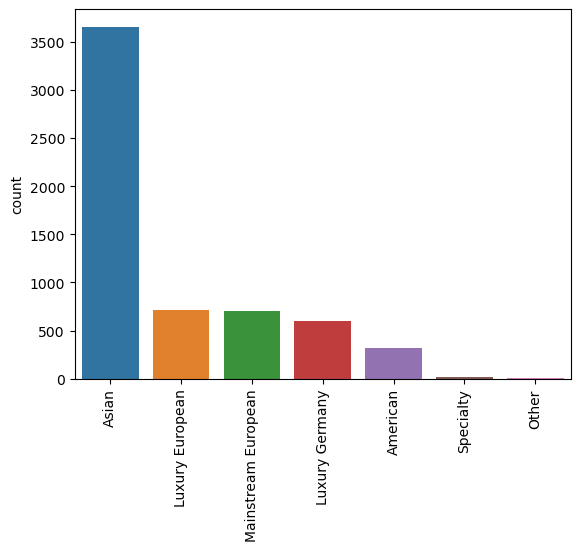

In [17]:
sns.barplot(x=data['Manufacture_segment'].unique(), y=data['Manufacture_segment'].value_counts())
plt.xticks(rotation=90)

In the dataset, most of the cars used in India are Asian. However, the dataset also has European(Luxury & Mainstream), Germany and American.

$Categorical Variable Distribution$

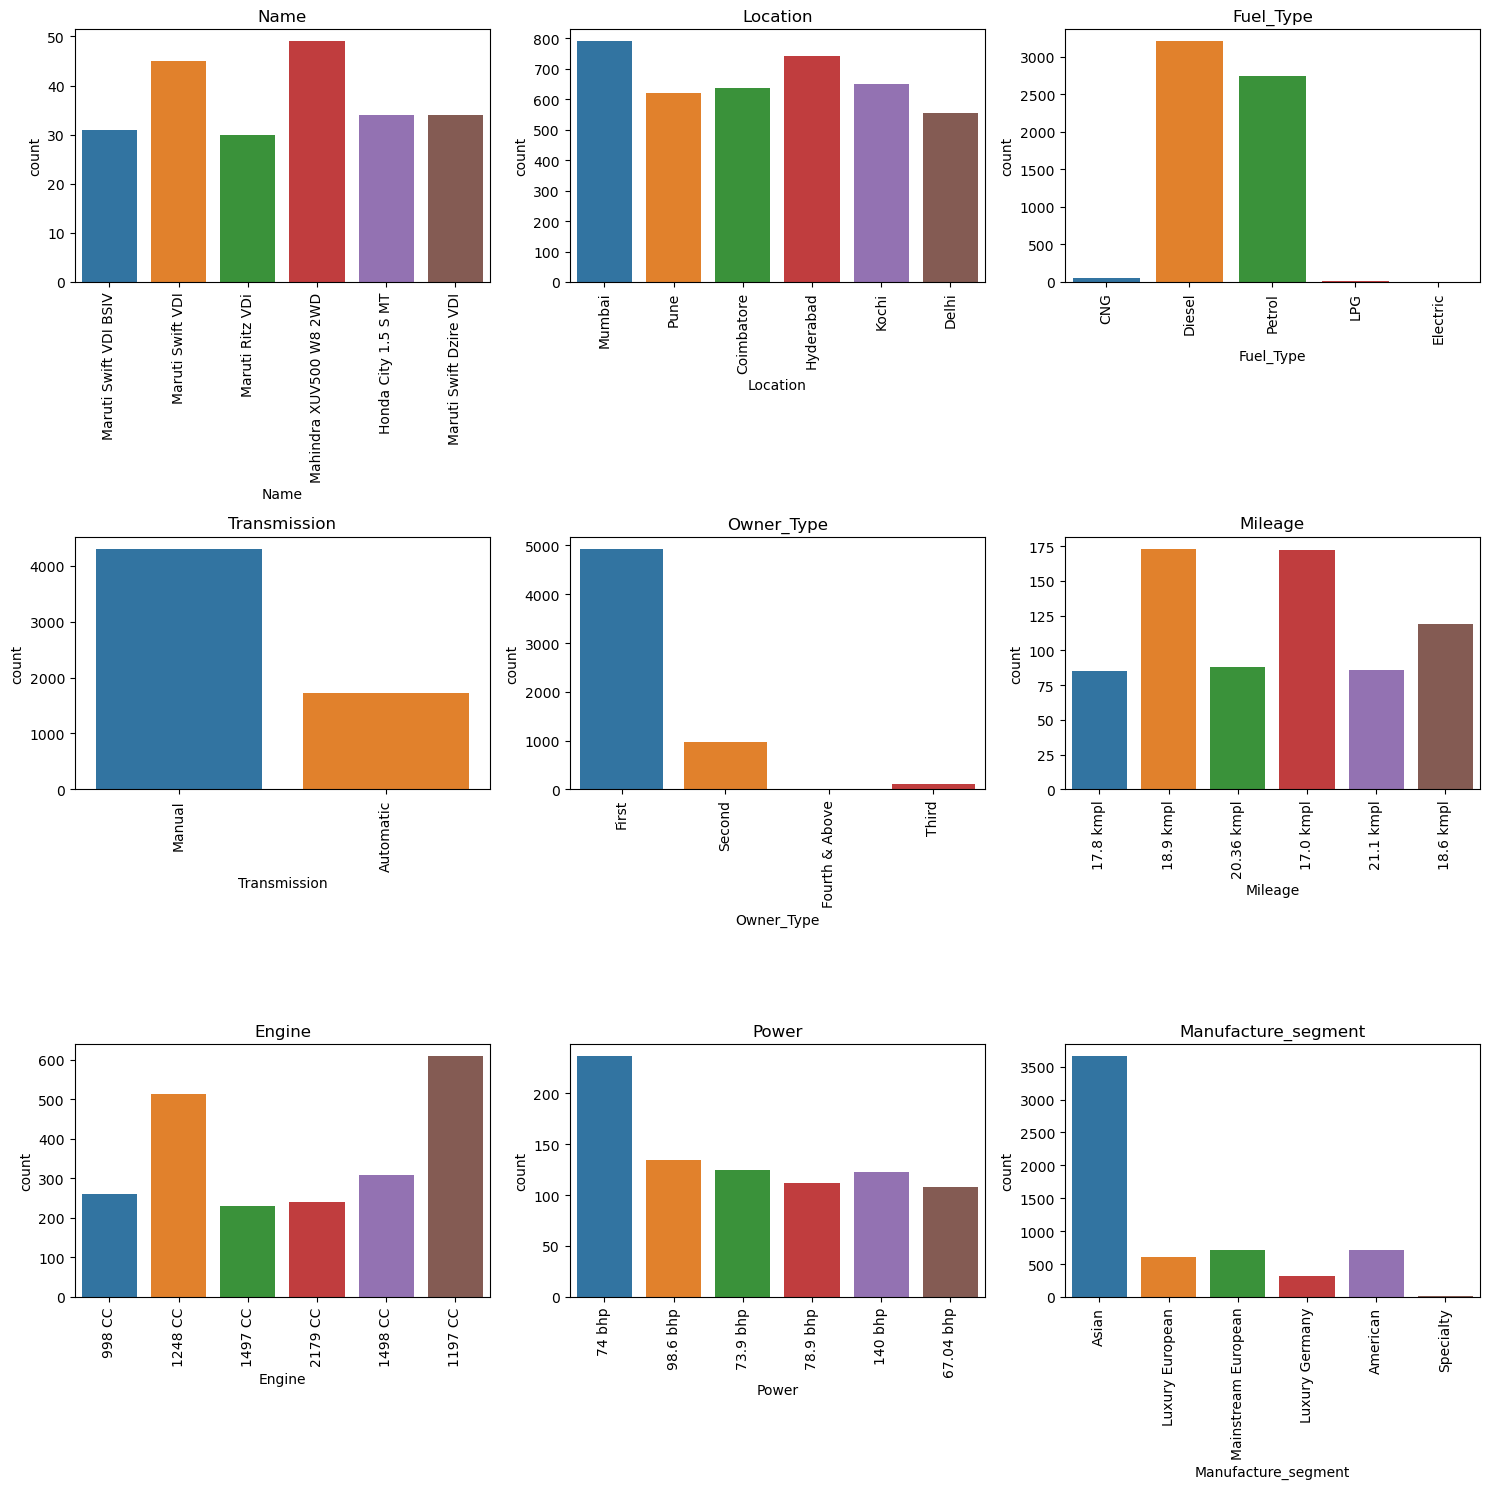

In [18]:
cat_col = data.select_dtypes(include='object').columns
col_num = len(cat_col)
row_num = (col_num+2)//3

fig, axs = plt.subplots(nrows=row_num, ncols=3, figsize=(15,5*row_num))
axs=axs.flatten()

for i, var in enumerate(cat_col):
    top_values=data[var].value_counts().nlargest(6).index
    filtered_df = data[data[var].isin(top_values)]
    sns.countplot(x=var,data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)
    
for i in range( col_num,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

From the above graphs, we can get an overview regarding the data across the categorical variables in the data set. By studying the graphs it is clear that majority of the cars are being sold are Asian based companies like Maruti, Mahindra, Honda. Most of the cars have manual transmission. Prefered New first hand car and second followed by third handed owner ship. Majority of them run on Diesel followed by petrol and hardly any of them runs on electricity.

$Continuous Variable Distribution$

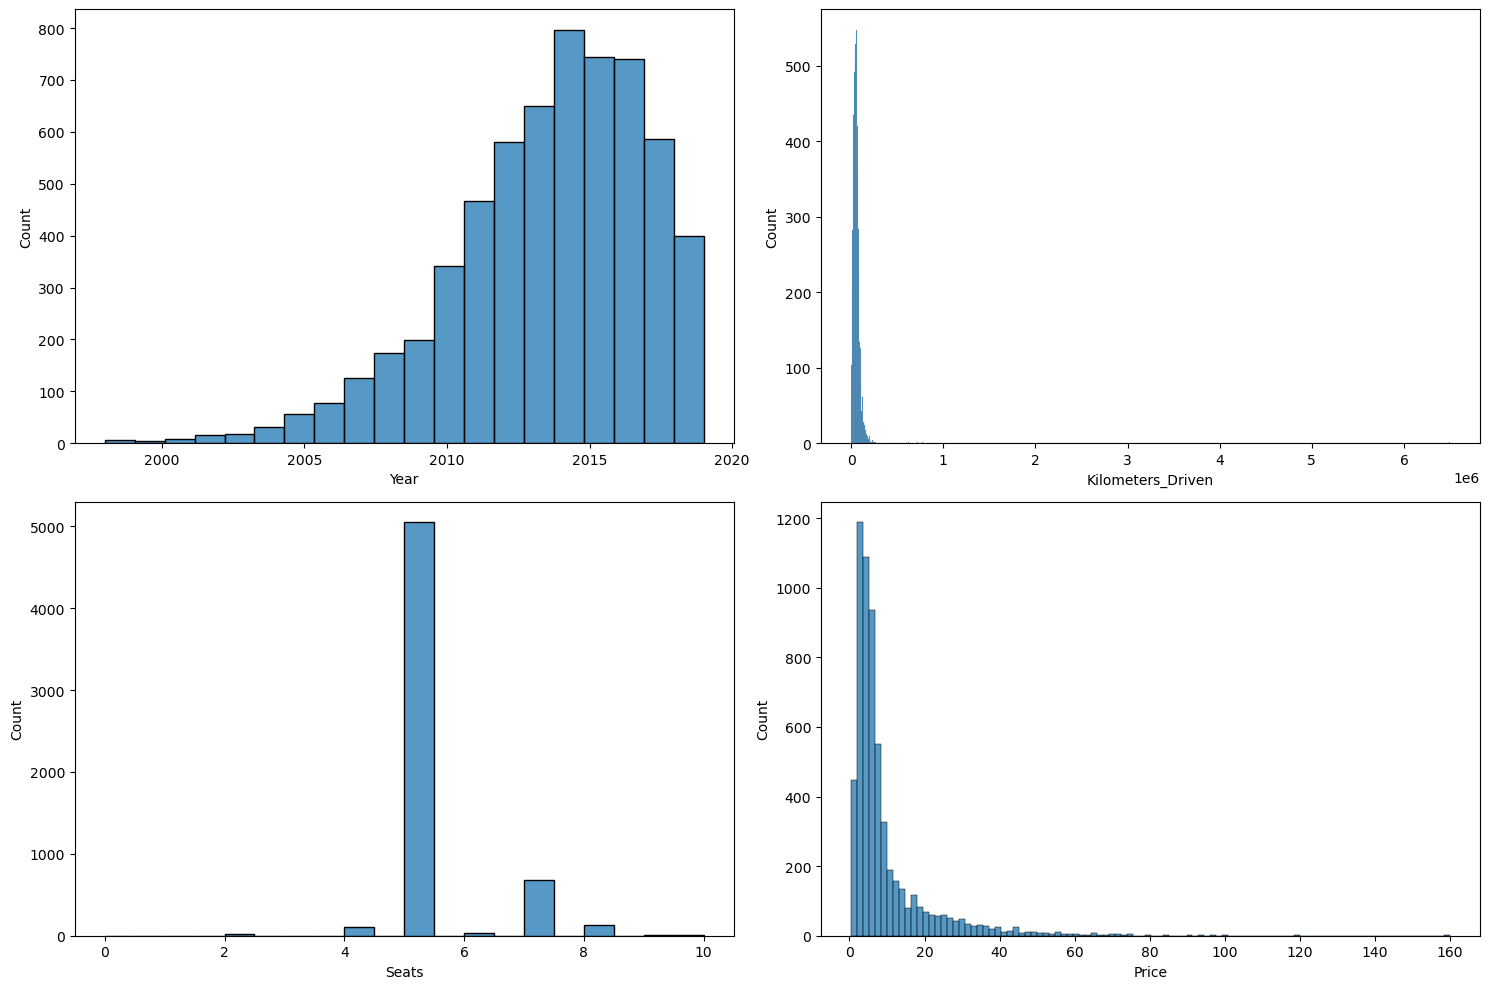

In [19]:
num_col = data.select_dtypes(exclude='object').columns
col_num = len(num_col)
row_num = (col_num+2)//3

fig, axs = plt.subplots(nrows=row_num, ncols=2, figsize=(15,5*row_num))
axs=axs.flatten()

sns.histplot(data['Year'], ax=axs[0],bins=20)
sns.histplot(data['Kilometers_Driven'], ax=axs[1],bins=1000)
sns.histplot(data['Seats'], ax=axs[2], bins=20)
sns.histplot(data['Price'], ax=axs[3],bins=100)
fig.tight_layout()
plt.show()

The above graph shows the distribution of the data across continuous variables. Majority of car sales and manufacturing took place between 2010 to 2020, kilometers driven 1 lakh kms, prefernce in 5 seater occupancy, Majority car production at price 20Lakhs.

In [20]:
# price vs car
demo=pd.DataFrame()
l=[]
for i in data['Name']:
    l.append(i.split()[0])
demo['Model']=l
demo['Price']= data['Price']
demo

,Model,Price
0,Maruti,1.75
1,Hyundai,12.50
2,Honda,4.50
3,Maruti,6.00
4,Audi,17.74
...,...,...
6014,Maruti,4.75
6015,Hyundai,4.00
6016,Mahindra,2.90
6017,Maruti,2.65


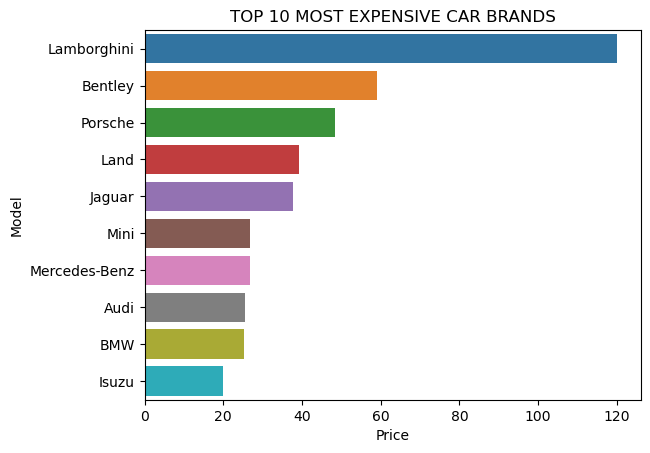

In [21]:
demodf = demo.groupby('Model')['Price'].mean().reset_index()
demo = demodf.sort_values(by='Price',ascending=False).head(10)
sns.barplot(x='Price', y='Model', data=demo)
plt.title("TOP 10 MOST EXPENSIVE CAR BRANDS")
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Lamborghini, Bentley, Porsche, Land-Rover,Jaguar.

# Price vs. Condition #

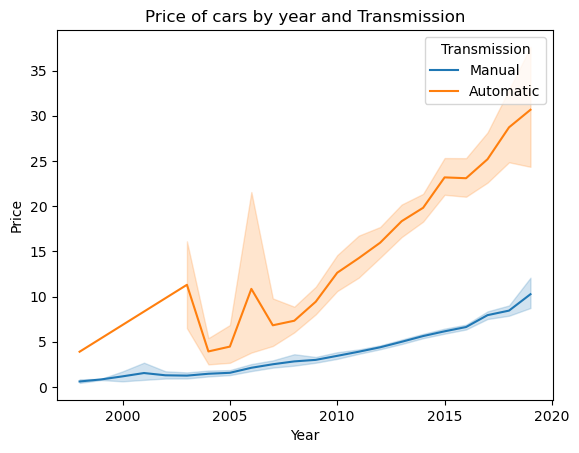

In [22]:
sns.lineplot(x='Year', y='Price', data=data, hue='Transmission')
plt.title('Price of cars by year and Transmission')
plt.show()

This graph reveals the changes in the car prices based on transmission. The price of the cars with automatic transmission decreased during 2005, however its price increased exponentially after 2010. Prices of cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2010.

# Price vs. Fuel type #

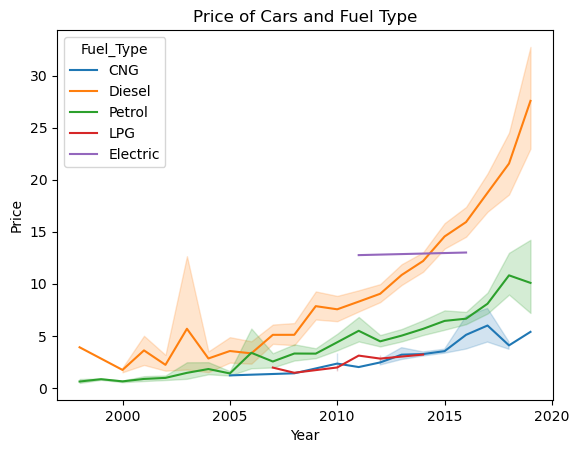

In [23]:
sns.lineplot(x='Year', y='Price', hue='Fuel_Type', data=data)
plt.title("Price of Cars and Fuel Type")
plt.show()

Post 2010, the price on the cars running on Diesel has increased exponentially, whereas price of the cars running on Petrol observerd slight increase significantly. Prices of the cars running on CNG, LPG took a very minimal price shifts.

# Price Vs. Ownertype #

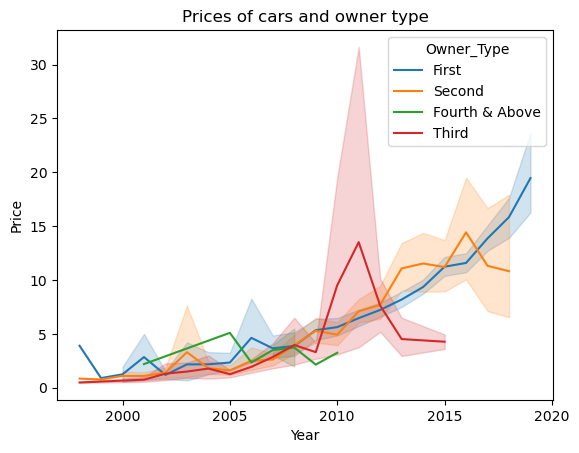

In [24]:
sns.lineplot(x='Year', y='Price', hue='Owner_Type', data=data)
plt.title("Prices of cars and owner type")
plt.show()

Prices of new cars is increased after 2010, same as in second hand cars. Whereas prices of cars, third ownership has seen exponential increase and steep fall during 2010 to 2015.

# Price vs. Brand segement # 

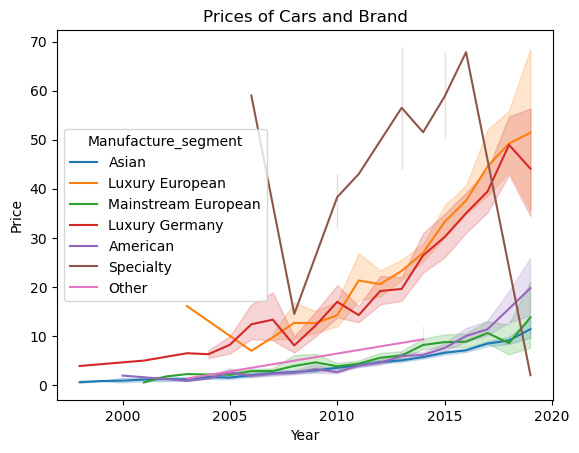

In [25]:
sns.lineplot(data=data, x='Year', y='Price', hue='Manufacture_segment')
plt.title('Prices of Cars and Brand')
plt.show()

This graph shows the surge in car prices after 2010 for Luxury European and Germany cars, however we see gradual price increase in Asian, Mainstream European, American, other based cars.
Whereas Speaciality cars, after 2005, steep fall and rise in prices and even during 2020 still observed fall in prices.

# Data Preprocessing Part2 #

*Label Encoder*

In [26]:
data.select_dtypes(include='object').nunique()

Name                   1876
Location                 11
Fuel_Type                 5
Transmission              2
Owner_Type                4
Mileage                 442
Engine                  146
Power                   372
Manufacture_segment       7
dtype: int64

In [27]:
data.drop('Name',axis=1, inplace=True)
col=['Mileage','Engine','Power']
for i in col:
    i_data=data[i].str.split(expand=True)
    data[i]=pd.to_numeric(i_data[0], errors='coerce')
data
     

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacture_segment
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Asian
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Asian
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Asian
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Asian
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Luxury European
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75,Asian
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00,Asian
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90,American
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65,Asian


In [28]:
le = LabelEncoder()
for i in data.select_dtypes(include='object').columns:
    data[i] = le.fit_transform(data[i])
    print(i, data[i].unique())

Location [ 9 10  2  3  5  6  7  8  4  1  0]
Fuel_Type [0 1 4 3 2]
Transmission [1 0]
Owner_Type [0 2 1 3]
Manufacture_segment [1 2 4 3 0 6 5]


In [29]:
data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacture_segment
0,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75,1
1,10,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50,1
2,2,2011,46000,4,1,0,18.20,1199,88.70,5.0,4.50,1
3,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00,1
4,3,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4,2014,27365,1,1,0,28.40,1248,74.00,5.0,4.75,1
6015,6,2015,100000,1,1,0,24.40,1120,71.00,5.0,4.00,1
6016,6,2012,55000,1,1,2,14.00,2498,112.00,8.0,2.90,0
6017,8,2013,46000,4,1,0,18.90,998,67.10,5.0,2.65,1


<Axes: >

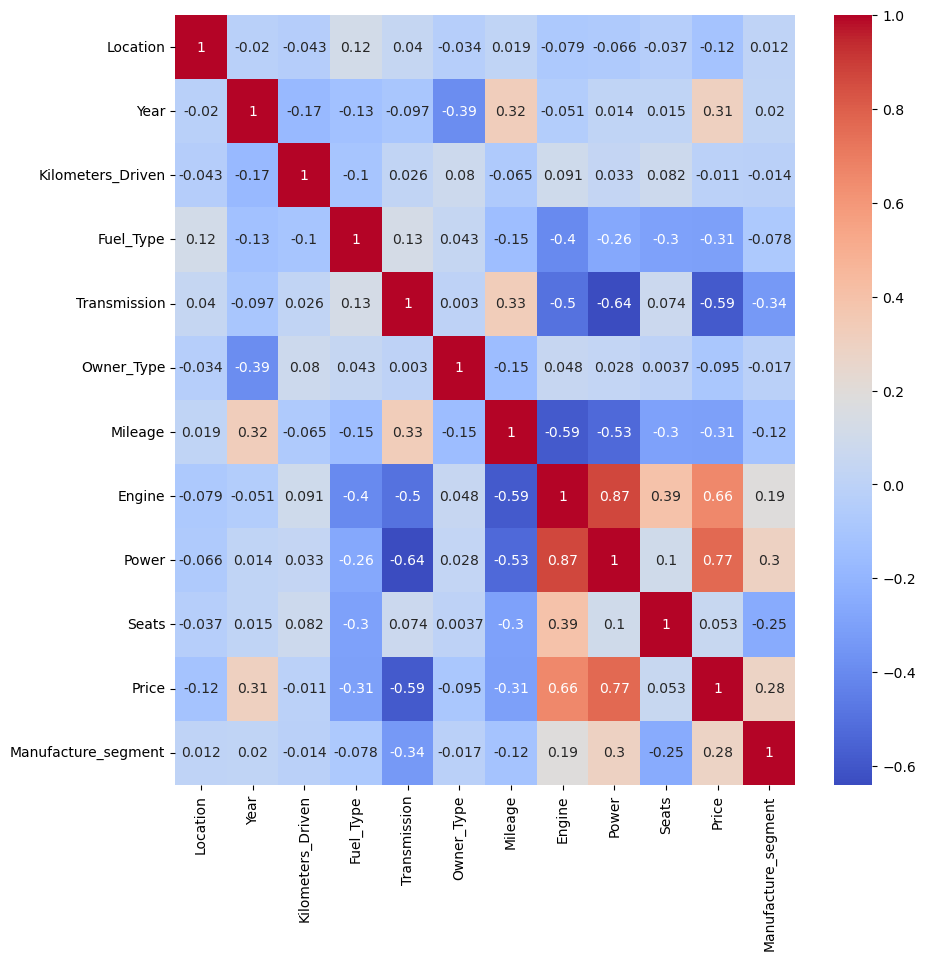

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [31]:

data.bfill(inplace=True)
data.to_csv("processedData.csv", index=False)